Forward propogation in a Neural Network is just an extrapolation of how we worked with [Logistic Regression](https://napsterinblue.github.io/notes/#ml_regression), where the caluculation chain just looked like

In [1]:
from IPython.display import Image

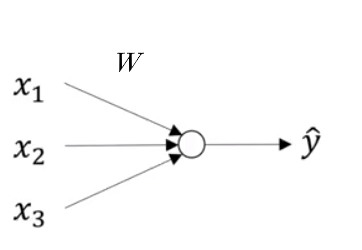

In [3]:
Image('images/logit.PNG')

Our equation before,

$\hat{y} = w^{T} X + b$

was much simpler in the sense that:

- `X` was an `n x m` vector (`n` features, `m` training examples)
- This was matrix-multiplied by `w` an `n x 1` vector of weights (`n` because we want a weight per feature)
- Then we broadcast-added `b`
- Until we wound up with an `m x 1` vector of predictions

## A Different Curse of Dimensionality

Now when we get into Neural Networks, with multiple-dimension matrix-multiplication to go from layer to layer, things can get pretty hairy.

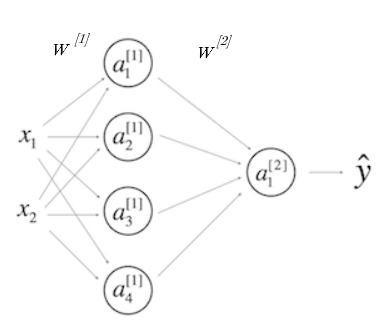

In [4]:
Image('images/dimensions.PNG')

### Terminology

- Our **input layer** `X` is still `n x m`
- Our **output layer** is still `m x 1`.
- **Hidden/Activation layers** are the nodes organized vertically that represent intermediate calculations.
  - The superscript represents which layer a node falls in
  - The subscript is which particular node you're referencing
- The **weights matricies** are the values that take you from one layer to the next via matrix multiplication.
  - *PAY CAREFUL ATTENTION TO THE FACT that **W1 takes you from layer 1 to layer 2***

### Keeping the Dimensions Straight

Always refer back to the fact that dot-producting two matricies along a central dimension cancels it out. For instance:

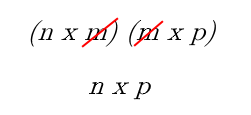

In [5]:
Image('images/cancelling.png')

Therefore, understanding which dimension your data should be in is an exercise in plugging all of the gaps to get you from `X` to `y`

#### W1

Getting to `a2` means following the equation

$a^{[2]} = W^{[1]}X$

As far as dimensions go, we're looking at

- `X`: `n x m`
- `a1`: `4 x m`

Subbing the *dimensions* in for the variables, we can start to fill in the gaps

$(4, m) = (?, ??) (n, m)$

because we know that we want `4` as the first value

$(4, m) = (4, ??) (n, m)$

we just need

$(4, m) = (4, n) (n, m)$

Thus

$dim_{W} = (4, n)$

### More Generally

If layer `j` is `m`-dimensional and layer `j+1` is `n`-dimensional

$W^{j} \quad \text{(which maps from j to j+1) has dimensionality} \quad (n \times m)$

## Vectorizing the Implementation

The following image (grabbed from *Computing a Neural Network's Output* in Week 3) is as busy as it is informative.

It color-codes the same simple as above, highlighting the stacking approach to go from various vectors (e.g. `z[1]1, z[1]2, z[1]3, z[1]4`) to one large, unified matrix of values (`Z[1]`)

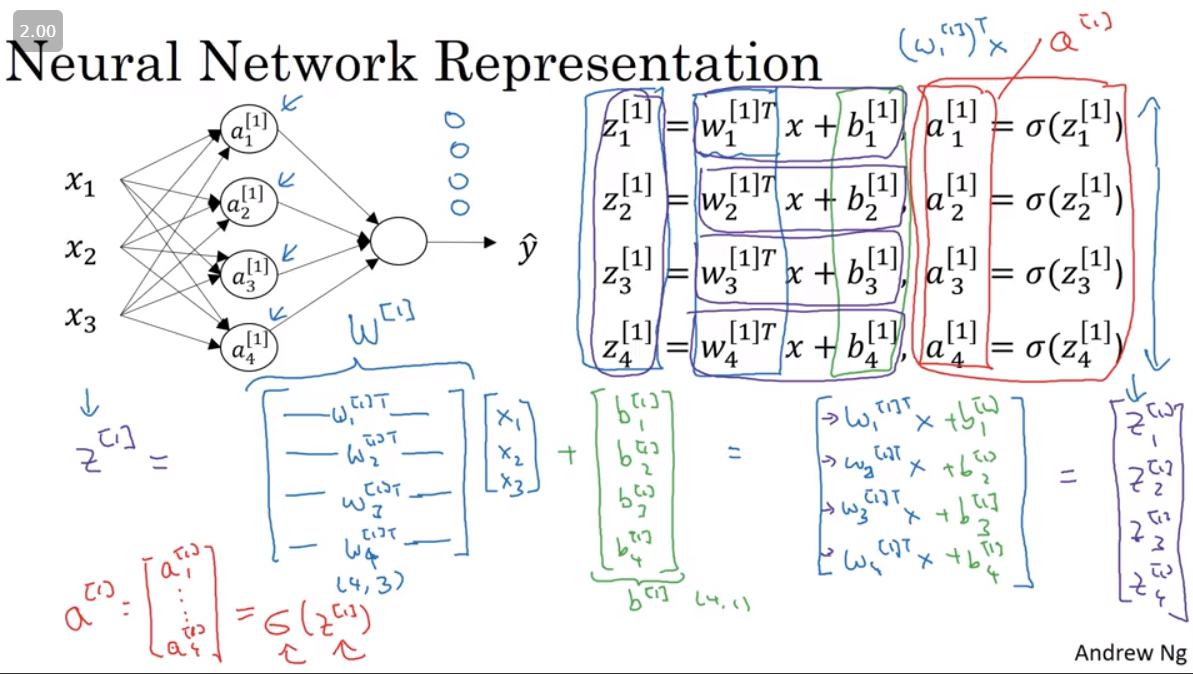

In [6]:
Image('images/vectorizing.png')

And so the process becomes 4 simple equations for one training example

$z^{[1]} = W^{[1]} x + b^{[1]}$

$a^{[1]} = sigmoid(z^{[1]})$

$z^{[2]} = W^{[2]} a^{[1]} + b^{[2]}$

$a^{[2]} = sigmoid(z^{[2]})$

In Python

``` python
z1 = np.dot(W1, x) + b1
a1 = sigmoid(z1)
z2 = np.dot(W2, a1) + b2
a2 = sigmoid(z2)
```

If you want to extend to multiple training examples, you introduce a `(i)` notation, where

$a_{2}^{[1](i)}$

refers to the `2nd` node activation, in the `1st` hidden layer, of the `ith` training example. And propogating for each prediction involves a big `for` loop

``` python
for i in range(len(x)):
    z1[i] = np.dot(W1, x[i]) + b1
    a1[i] = sigmoid(z1[i])
    z2[i] = np.dot(W2, a1[i]) + b2
    a2[i] = sigmoid(z2[i])
```

Or less-awfully, we can vectorize the whole thing

$Z^{[1]} = W^{[1]}X + b^{[1]}$

$A^{[1]} = sigmoid(Z^{[1]})$

$Z^{[2]} = W^{[2]}A^{1} + b^{[2]}$

$A^{[2]} = sigmoid(Z^{[2]})$

In Python

``` python
Z1 = np.dot(W1, X) + b1
A1 = sigmoid(Z1)
Z2 = np.dot(W2, A1) + b2
A2 = sigmoid(Z2)
```